# Investigating Natural Increase in Australia's population 


#### A1. Investigating the Births, Deaths and TFR Data 
1. Using Python, plot the number of births recorded in each state/territory for different Australian states over different years.<br>


In [1]:
import pandas as pd # importing libraries
import matplotlib.pyplot as plt 

In [2]:
births = pd.read_csv("Births.csv") # importing data
births.head()  #exploring the data

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
0,1977,78173,4381,35069,19086,20981,6739,59602,2923
1,1978,78190,4342,35054,18964,21094,6751,59364,2600
2,1979,77669,4217,34858,18403,20523,6947,58006,2747
3,1980,78859,4181,34666,18317,20354,6660,57768,2859
4,1981,80980,4193,37545,18960,21277,7112,58104,2749


<font color="green"><b>
After importing the data, we will now make the plots. Firslty, we will create individual plots of each state. The reason we are not plotting than togetter is that they have different sizes, and in the same scale it would not be a great visualization.
</font></b>

Text(0.5, 1.0, 'NT')

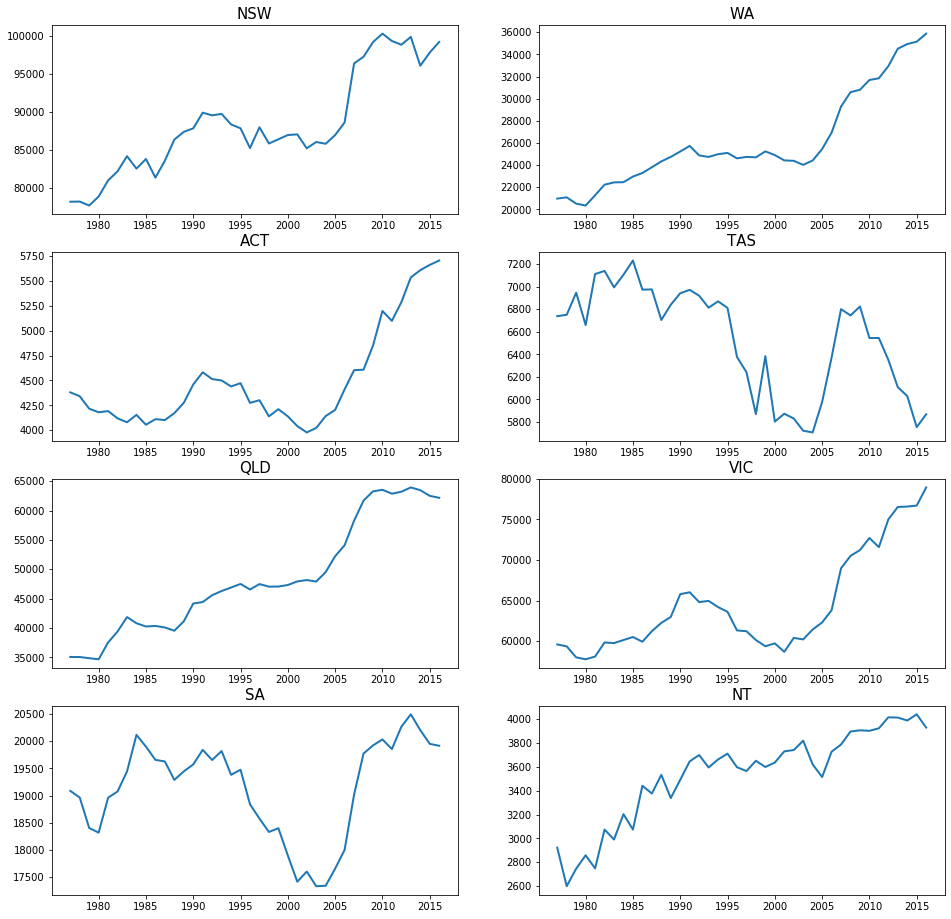

In [3]:
# plotting the data

fig, ax = plt.subplots(4,2, figsize = (16,16)) # creating a figure with many subplots

ax[0,0].plot( 'Year', 'NSW', data=births, linewidth=2)
ax[0, 0].set_title('NSW', fontsize = 15)
ax[1,0].plot( 'Year', 'ACT', data=births, linewidth=2)
ax[1, 0].set_title('ACT', fontsize = 15)
ax[2,0].plot( 'Year', 'QLD', data=births, linewidth=2)
ax[2, 0].set_title('QLD', fontsize = 15)
ax[3,0].plot( 'Year', 'SA', data=births, linewidth=2)
ax[3, 0].set_title('SA', fontsize = 15)
ax[0,1].plot( 'Year', 'WA', data=births, linewidth=2)
ax[0, 1].set_title('WA', fontsize = 15)
ax[1,1].plot( 'Year', 'TAS', data=births, linewidth=2)
ax[1, 1].set_title('TAS', fontsize = 15)
ax[2,1].plot( 'Year', 'VIC', data=births, linewidth=2)
ax[2, 1].set_title('VIC', fontsize = 15)
ax[3,1].plot( 'Year', 'NT', data=births, linewidth=2)
ax[3, 1].set_title('NT', fontsize = 15)


a. Describe the trend in number of births for Queensland and Tasmania for the period 1977
to 2016?<br>

<font color="green"><b>
Now we will make comparative plots of the states of Queensland and Tasmania over the period. Again, we will plot than saparetly, because they wouldn`t look nice on the same scale. An alternative could be a logplot, but it was not our choice this time.
</font></b>

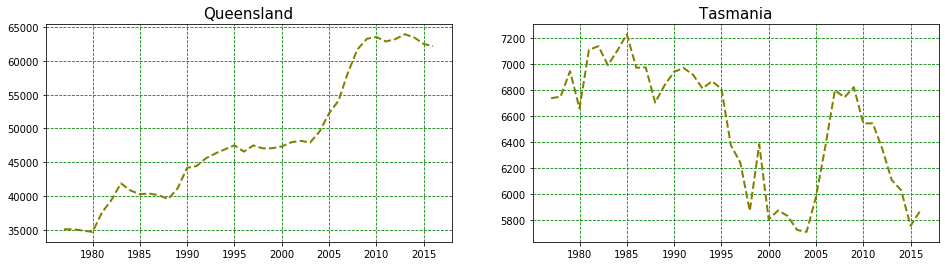

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))
ax1.plot('Year', 'QLD', data=births, linewidth=2, marker='', color='olive', linestyle='dashed', label="toto")
ax1.set_title('Queensland', fontsize = 15)
ax1.grid(color='g', linestyle='--')
ax2.plot('Year', 'TAS', data=births, linewidth=2, marker='', color='olive',linestyle='dashed', label="toto")
ax2.set_title('Tasmania', fontsize = 15)
ax2.grid(color='g', linestyle='--')


<font color="green"><b>
Ove the period 1977 - 2016 the number of births on the State of Queensland had a significant, almost constant, increase. The trend is specially strong in the beginning of the 80`s decade, but also between 2005 - 2010. A few downward trends can also be observed at the linechart, but they are not significant compared to the other years.<br>
Regarding the state of Tasmania, there is a lot of variance in the periodo, but defenetly a donward trend. Over the decades of 1900 and 2010 we can see that the curve is quite negative, and only during the period of 2005 - 2010 we can see a strong increase, but at the end, the chart ends at a much lower level than where it begins. 
    
</font></b>

b. Draw a bar chart to show the number of births in each Australian state in 2016.


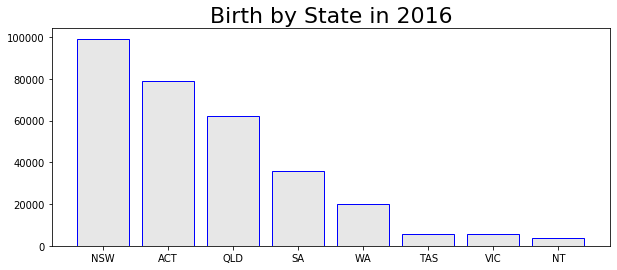

In [5]:
import numpy as np
births = births.set_index('Year') # changing the index
births_2016 = list(births.loc[2016,:])
births_2016.sort(reverse = True)
states = list(births.columns)
y_pos = np.arange(len(births_2016))

plt.figure(figsize = (10,4))
plt.bar(y_pos, births_2016, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xticks(y_pos, states)
plt.title('Birth by State in 2016', fontsize = '22')

plt.show()


#### 2. We will now investigate the trend in the total number of births over different years. For this, you will need to aggregate the total number of births registered in Australia by year.

a. Fit a linear regression using Python to the above aggregated data (i.e., total number of births registered in Australia over time) and plot the linear fit.<br>


In [6]:
# aggregating number of births
births.loc[:,'Total_Births'] = births.sum(axis=1) # creating a column total births
births.head()

,NSW,ACT,QLD,SA,WA,TAS,VIC,NT,Total_Births
Year,,,,,,,,,
1977,78173,4381,35069,19086,20981,6739,59602,2923,226954
1978,78190,4342,35054,18964,21094,6751,59364,2600,226359
1979,77669,4217,34858,18403,20523,6947,58006,2747,223370
1980,78859,4181,34666,18317,20354,6660,57768,2859,223664
1981,80980,4193,37545,18960,21277,7112,58104,2749,230920


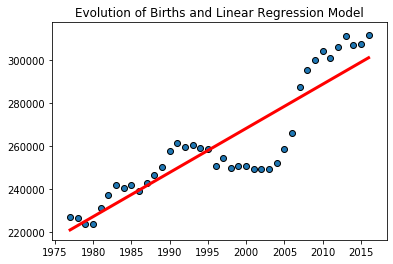

In [7]:
from scipy.stats import linregress # importing the library
slope, intercept, r_value, p_value, std_err = linregress(births.index,births['Total_Births']) # performig calculations
line = [slope*xi + intercept for xi in births.index] 
plt.plot(births.index,line,'r-', linewidth=3)
plt.scatter(births.index, births['Total_Births'], edgecolor = 'black')
plt.title('Evolution of Births and Linear Regression Model')
plt.show()

In [8]:
print('slope =', round(slope,0))
print('intercept =', round(intercept, 0))
print('r_value =', round(r_value,0))
print('p_value =', round(p_value,3))
print('std_err =', round(std_err,3))

slope = 2056.0
intercept = -3844203.0
r_value = 1.0
p_value = 0.0
std_err = 167.638


b. Does it look like a good fit to you? Identify the period time having any unusual trend(s) in your plot.<br>


<font color="green"><b>
The linear regression does not look like a good fit for the data over this period. The line has a behaviour that is not compatible with a simple line, it has an cyclical behaviour that may related to a n degree equation, or a time series model.<br>
The period between 1995 - 2005 is specially unsual. First we may observe a donward trend, but followed by a very significant increase on births number. A clear S shape, not good to be modelled by a linear regression.  
</font></b>

c. Use the linear fit to predict the total births in Australia for the years 2050 and 2100.<br>

<font color="green"><b>
Applying the model: 
</font></b>

In [9]:
births_2050 = slope*2050 + intercept
births_2100 = slope*2100 + intercept
print('The predicted number of births for 2050 is', int(births_2050))
print('The predicted number of births for 2100 is', int(births_2100))

The predicted number of births for 2050 is 370945
The predicted number of births for 2100 is 473754


<font color="green"><b>
Additionaly, lets plot again our data and the model, however, showing the model behaviour until 2100.   
</font></b>

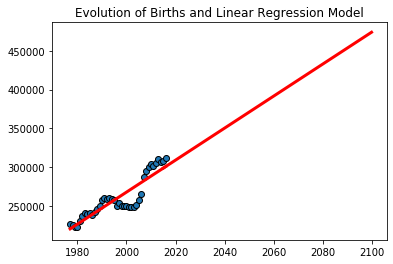

In [10]:
period = list(range(2015,2101)) # making a list with the period

# repeating the same process
new_line = [slope*xi + intercept for xi in period]
plt.plot(period,new_line,'r-', linewidth=3)
plt.plot(births.index,line,'r-', linewidth=3)
plt.scatter(births.index, births['Total_Births'], edgecolor = 'black')
plt.title('Evolution of Births and Linear Regression Model')
plt.show()

d. Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points (say from 2010 onwards). How is the fit? Which model would give better predictions of future population of Australia do you think and why?<br>


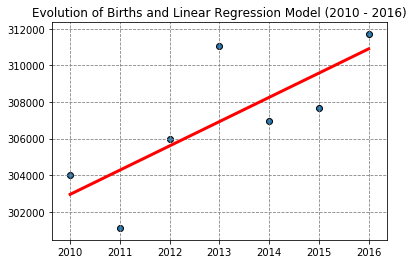

In [11]:
new_births = births[births.index > 2009 ] # restrcting the period

# creating a regression.
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(new_births.index,new_births['Total_Births'])
line = [slope2*xi + intercept2 for xi in new_births.index]
plt.plot(new_births.index,line,'r-', linewidth=3)
plt.scatter(new_births.index, new_births['Total_Births'], edgecolor = 'black')
plt.title('Evolution of Births and Linear Regression Model (2010 - 2016)')
plt.grid(color='grey', linestyle='--')
plt.show()


In [12]:
print('slope =', round(slope2,0))
print('intercept =', round(intercept2, 0))
print('r_value =', round(r_value2,0))
print('p_value =', round(p_value2,3))
print('std_err =', round(std_err2,3))

slope = 1325.0
intercept = -2360870.0
r_value = 1.0
p_value = 0.044
std_err = 496.18


<font color="green"><b>
The pattern of the data from 2010 onwards suits best a linear regression, therefore, this model would be better to predict the future number of births in Australia. Linear regressions have as purpose to spot linear tendencies over time. There is a clear tendency of growth in this plot, but with standard errors that look normally distributed, that is exactly what makes linear models have a good fit. In the other plot there is also a growth tendency, but it is cyclical and therefore not suited for a linear regression.   
</font></b>

e. Challenge: Can you think of a better model than linear regression to fit to all of the data to capture the trend in the number of births.<br>
i. Describe the model you suggested and explain why it is better suited for this task.<br>

<font color="green"><b>
A polynomial equation of third degree is the best way to model the data of births in Australia.<br> 
over the exercise we were able to explore why linear regressions do not fit complex and cyclical relations between variables.
A polynomial equation suits this data because it is able to capture this complex trend. A possibly better model wold be with time series, however due to limitation of knowledge and time we wont explore it in this question.
</font></b>

In [13]:
import numpy as np 

years_list = list(births.index)
births_list = list(births.Total_Births)

x = np.array(years_list)
y = np.array(births_list)
z = np.polyfit(x, y, 3)
p = np.poly1d(z)

ii. Use your model to predict the total births for the years 2050 and 2100.

In [14]:
print('The predicted number of births for the year of 2050 is:',round(p(2050),0))
print('The predicted number of births for the year of 2100 is:',round(p(2100),0))

The predicted number of births for the year of 2050 is: 1137796.0
The predicted number of births for the year of 2100 is: 5872321.0


<font color="green"><b>
Aditionally, lets observe two plots. The first is how the model fits the data, and the second, the prediction for the period until 2100.
</font></b>

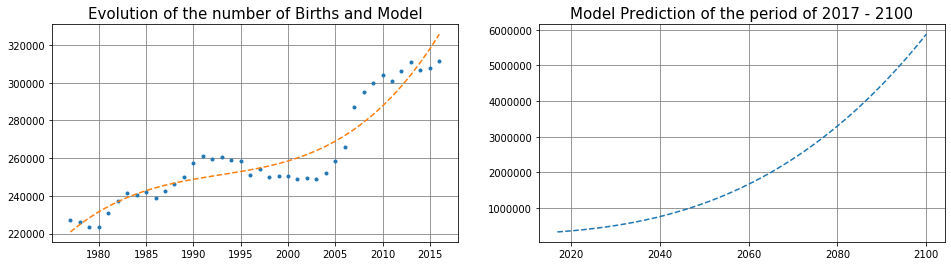

In [15]:
d = list(range(2017,2101))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))
ax1.plot(x, y, '.', years_list, p(years_list), '--')
ax1.set_title('Evolution of the number of Births and Model', fontsize = 15)
ax1.grid(color='gray', linestyle='-')
ax2.plot(d, p(d), '--')
ax2.set_title('Model Prediction of the period of 2017 - 2100', fontsize = 15)
ax2.grid(color='gray', linestyle='-')


3. Inspect the data on Total Fertility Rate (TFR.csv) for Queensland and Northern Territory.<br>
a. What was the minimum value for TFR recorded in the dataset for Queensland and when did that occur? What was the corresponding TFR value for Northern Territory in the same year?

In [16]:
TFR = pd.read_csv('TFR.csv')
TFR = TFR.set_index('Year') # changing the index
TFR.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
Year,,,,,,,,
1971,2.806,2.858,3.025,2.629,3.047,2.903,4.029,2.908
1972,2.653,2.634,2.854,2.423,2.673,2.695,3.477,2.728
1973,2.385,2.393,2.637,2.192,2.391,2.461,3.291,2.493
1974,2.303,2.298,2.500,2.113,2.263,2.422,2.988,2.444
1975,2.125,2.099,2.316,1.999,2.182,2.232,2.846,2.137


In [17]:
print('The minimum fertility rate for Queensland was', TFR['QLD'].min(), 'in the year of', 
      TFR[TFR['QLD'] == TFR['QLD'].min()].index[0])


The minimum fertility rate for Queensland was 1.8 in the year of 1999


In [18]:
year = TFR[TFR['QLD'] == TFR['QLD'].min()].index[0]

print('The fertility rate for NT was', TFR.loc[year, 'NT'], 'in the year of', year)


The fertility rate for NT was 2.123 in the year of 1999


4. Next, plot the natural growth in Australia's population over different years. For this, you will need to aggregate the total births and deaths by year. (HINT: Natural growth in a population is the difference between the total numbers of births and deaths in a population, for instance, Natural Growth of Australia’s Population = Total Births in Australia - Total Deaths in Australia)<br>
a. Describe the trend in natural growth in Australian population over time using linear regression?

In [19]:
deaths = pd.read_csv('Deaths.csv')
deaths = deaths.set_index('Year')
deaths['Total_Deaths'] = deaths.sum(axis=1)
deaths.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Total_Deaths
Year,,,,,,,,,
1977,42075,30067,16991,9715,7914,3227,715,786,111490
1978,40121,29343,16353,9768,7781,3299,612,782,108059
1979,39975,29523,16627,9748,7779,3318,586,759,108315
1980,39799,28925,15774,9536,8078,3199,588,755,106654
1981,39979,29144,17195,9806,8345,3494,671,795,109429


In [20]:
growth  = pd.merge(births, deaths, on='Year')
growth = growth.loc[:,['Total_Deaths','Total_Births']]
growth['Natural_Growth'] = growth['Total_Births'] - growth['Total_Deaths']
growth.head()

,Total_Deaths,Total_Births,Natural_Growth
Year,,,
1977,111490,226954,115464
1978,108059,226359,118300
1979,108315,223370,115055
1980,106654,223664,117010
1981,109429,230920,121491


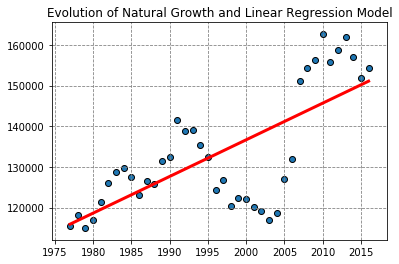

In [21]:
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(growth.index,growth['Natural_Growth'])
line = [slope3*xi + intercept3 for xi in growth.index]
plt.plot(growth.index,line,'r-', linewidth=3)
plt.scatter(growth.index, growth['Natural_Growth'],  edgecolor = 'black')
plt.title('Evolution of Natural Growth and Linear Regression Model')
plt.grid(color='grey', linestyle='--')
plt.show()


In [22]:
print('slope =', round(slope3,0))
print('intercept =', round(intercept3, 0))
print('r_value =', round(r_value3,0))
print('p_value =', round(p_value3,3))
print('std_err =', round(std_err3,3))

slope = 901.0
intercept = -1664685.0
r_value = 1.0
p_value = 0.0
std_err = 145.888


#### A2. Investigating the Migration Data (NOM and NIM)
1.Let’s look at the Net Overseas Migration (NOM) data in different states over time. <br>
a.Use Python to plot the NOM to Victoria, Tasmania and Western Australia over time. Explain and compare the trend in all three states (VIC, TAS and WA).


In [23]:
NOM = pd.read_csv('NOM.csv')
NOM.head()

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,1977,25236,17969,4012,2874,6631,506,408,261
1,1978,25825,18068,6857,2638,7340,428,1428,131
2,1979,28086,15874,6489,541,3698,263,442,-256
3,1980,33499,20932,9480,3325,7309,599,361,436
4,1981,47291,29052,18168,6655,14866,1268,1043,832


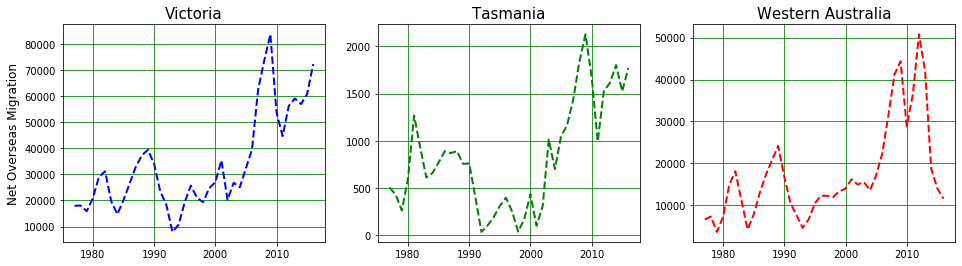

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,4))
ax1.plot( 'Year', 'VIC', data=NOM, linewidth=2, marker='', color='blue', linestyle='dashed', label="toto")
ax1.set_title('Victoria', fontsize = 15)
ax1.grid(color='g', linestyle='-')
ax1.set_ylabel('Net Overseas Migration', fontsize = 12)
ax2.plot('Year', 'TAS', data=NOM, linewidth=2, marker='', color='green',linestyle='dashed', label="toto")
ax2.set_title('Tasmania', fontsize = 15)
ax2.grid(color='g', linestyle='-')
ax3.plot('Year', 'WA', data=NOM, linewidth=2, marker='', color='red',linestyle='dashed', label="toto")
ax3.set_title('Western Australia', fontsize = 15)
ax3.grid(color='g', linestyle='-')
plt.show()


<font color="green"><b>
The states follow a very simillar pattern in their Net overseas Migration, with one small difference to be noticed. Describing the major trends: <br>
- Firstly, it is important to notice that we are describing a trend, because in absolute numbers we have big differences. 
- All states have seen a significant increase in their NOM during the period 2000-2010.
- All states have seen a significant decrease in their NOM during the period 1990-1995.
- All states have a very instable and volatile NOM, with no stable period.
- The state of Western Australia has a pattern that cannot be observed in other states, at the end of the period of the plot. There is a dramatic decrease from 2012 onwards, while in the other plots at the end there is a posite tendency.     
</font></b>

b.Plot the Net Overseas Migration (NOM) to Australia over time. Do you find the trendstrange? Explain the reason to your answer (Hint: You might go online to find contributingfactors to this trend).


In [25]:
# Creating a column called Total Migration
NOM['Total Migration'] = NOM.sum(axis = 1) 

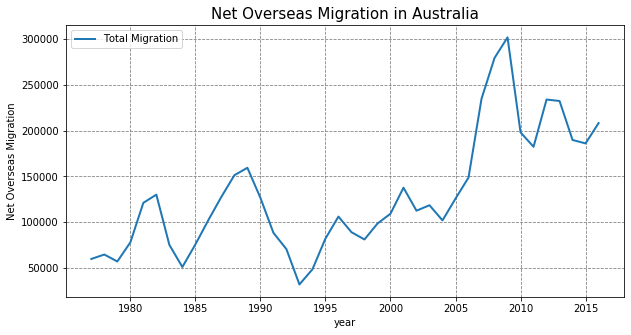

In [26]:
plt.figure(figsize = (10,5))
plt.plot( 'Year', 'Total Migration', data=NOM, linewidth=2)
plt.legend()
plt.xlabel('year')
plt.grid(color='grey', linestyle='--')
plt.ylabel('Net Overseas Migration')
plt.title("Net Overseas Migration in Australia", fontsize = 15)
plt.show()

<font color="green"><b>
The plot makes explict that the Australian policy for imigration has changed significantly over the past decades. Apparently, during 40 years, never two consecutive years had the exact same number (or very proximate). Some facts that contribute to understand the trend observed in this plot:
- After the world dotcom buble in 1999, the world had a economic boom during 8 years, in which Australia was extremely benefiated, which very large GDP growth. This fact may have led to a pressure for workers and Australia started to receive a higher intake of migrants to work here. 
- In 2008, again, the world saw a major financial crisis, and it is possible to observe a massive drop in the migrants intake in australia, that persisted over the years with some not very relevant variations.
    
</font></b>

2.Now let's look at the relationship between Net Overseas Migration (NOM) and Net InterstateMigration (NIM).<br>
a.Use Python to combine the data from the different files into a single table. The resulting table should contain the NOM and NIM values for each of the states for a given year. What are the first year and last year for the combined data? <br>


In [27]:
NOM = pd.read_csv('NOM.csv')
NIM = pd.read_csv('NIM.csv')

NOM_2 = pd.melt(NOM, id_vars= 'Year', var_name ='State', value_name ='NOM')
NIM_2 = pd.melt(NIM, id_vars= 'Year', var_name ='State' , value_name ='NIM')

NOM_NIM  = pd.merge(NOM_2, NIM_2, on=['Year', 'State'])
NOM_NIM.iloc[[0,-1],:]

,Year,State,NOM,NIM
0,1977,NSW,25236,-9000
319,2016,ACT,3330,383


<font color="green"><b>
- First year is 1977
- Last year is 2016 
</font></b>

b.Now that you have the data combined, we can see whether there is a relationship between NOM and NIM. Plot the values against each other using scatter plot. Can you see any relationship between NOM and NIM? <br>


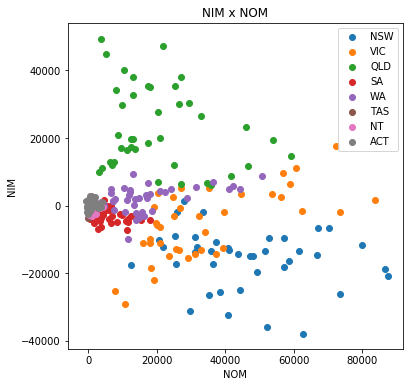

In [28]:
plt.figure(figsize = (6,6))
for state in NOM_NIM.State.unique():
    data=NOM_NIM[NOM_NIM.State==state]
    plt.scatter(data.NOM, data.NIM, label = state)
plt.legend()
plt.title('NIM x NOM')
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.show()

<font color="green"><b>
- It is very difficult to observe any relation between Net Overseas Migration and Net Interstate Migration in Autralia. 
- The data from years is extremely scattered over the plot, very bad to model with a linear regression, for instance. 
- It is worth mentioning however that aparently there is a sutile positive correlation in the state of Victoria.
- Regarding the state of NSW, the NOM is constantly positive, but the NIM constantly negative. The opposite is true for the state of Queensland.
- It is hard to observe any trend in the states of TAS, NT and SA since they are too small, and cannot be explored in the same scale than the others. 
</font></b>

c.Try selecting and plotting the data for Victoria only using scatter plot. Can you see a relationship now? If so, explain the relationship.<br>

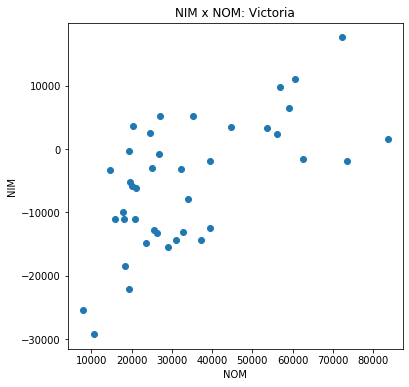

In [29]:
plt.figure(figsize = (6, 6))
data=NOM_NIM[NOM_NIM.State=='VIC']
plt.scatter(data.NOM, data.NIM)
plt.title('NIM x NOM: Victoria')
plt.xlabel('NOM')
plt.ylabel('NIM')
plt.show()

<font color="green"><b>
- As mentioned in the previous question, there is a positive correlation between NIM and NOM in the state of Victoria. 
- When plotting the state of Victoria individually the correlation becomes even more clear.
- Victoria is a state in constant economic expansansion. Our conclusion from this plot, is that over the years the migration to Victoria was from international citizens but also from Australians. 
</font></b>

d.Finally, plot the Net Interstate Migration (NIM) for Queensland and New South Wales overdifferent years. Note graphs for both QLD and NSW should be on the same plot. Comparethe plots for these two states. What can you infer from the trend you see for these two states?<br>

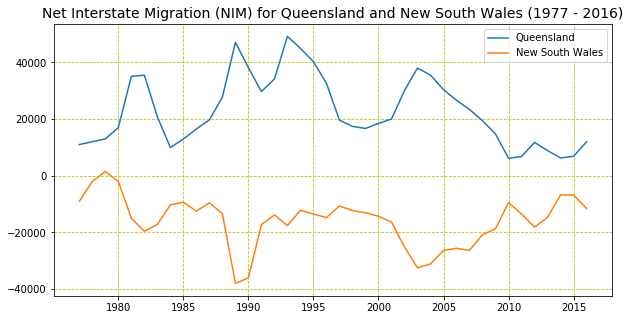

In [30]:
data_qld = NOM_NIM[['Year','NIM']][NOM_NIM.State=='QLD']
data_nsw = NOM_NIM[['Year','NIM']][NOM_NIM.State=='NSW']

plt.figure(figsize = (10,5))
plt.plot(data_qld.Year, data_qld.NIM, label = "Queensland")
plt.plot(data_nsw.Year, data_nsw.NIM, label = "New South Wales")
plt.title("Net Interstate Migration (NIM) for Queensland and New South Wales (1977 - 2016)", fontsize = 14)
plt.grid(color='y', linestyle='--')

plt.legend()
plt.show()

<font color="green"><b>
- There is a strong indication in this chart that over the years a part of the population from New South Wales migrated to the state of Queensland. Their NIM tendencies are negatively correlated throughout the years. 
</font></b>

# A3. Visualising the Relationship over Time
Now let's look at the relationship between other variables impacting the population size and growth of Australian states/territories over time. Ensure that you have combined all the data from the different files (Births.csv, Deaths.csv, TFR.csv, NOM.csv and NIM.csv) into a single table.<br>
1. Use Python to build a Motion Chart, that compares the role migration (overseas and interstate) plays towards population growth in each Australia state/territory over time. The motion chart shouldshow the Net Overseas Migration (NOM) on the x-axis, the Net Interstate Migration (NIM) on they-axis, and the bubble size should show the Total Population Growth. (HINT: A Jupyter notebookcontaining a tutorial on building motion charts in Python is available here)

<font color="green"><b>
Firstly, we will reimport all CSVs in new dataframes to avoid confusion with previous work. 
</font></b>

In [31]:
births_2 = pd.read_csv('Births.csv')
deaths_2 = pd.read_csv('Deaths.csv')
TFR_2 = pd.read_csv('TFR.csv')
NOM_2 = pd.read_csv('NOM.csv')
NIM_2 = pd.read_csv('NIM.csv')

<font color="green"><b>
And create another table for growth, but differently, this time, the focus will be on the states and not the aggregate.  
</font></b>

In [32]:
growth_2 = births_2 - deaths_2
growth_2['Year'] = births_2['Year'] # Year column was corrupted, replacing it  
growth_2.head() 

,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,Year
0,3595,36098,2208,18078,9371,3512,29535,13067,1977
1,3560,38069,1988,18701,9196,3452,30021,13313,1978
2,3458,37694,2161,18231,8655,3629,28483,12744,1979
3,3426,39060,2271,18892,8781,3461,28843,12276,1980
4,3398,41001,2078,20350,9154,3618,28960,12932,1981


<font color="green"><b>
However, we are not ready yet to do the chart. As we can see in the Motionchart tutorial, the data needs to be in different format than the one we have at the moment. This is why we will reshape it using the melt function. What we will do its to aggregate the States in only two columns (State and value), in opposition to one column for each state. 
</font></b>

In [33]:
# applying the melt function to do aggregations
growth_2 = pd.melt(growth_2, id_vars = 'Year', var_name ='State', value_name ='Growth')
TFR_2 = pd.melt(TFR_2, id_vars= 'Year', var_name ='State', value_name ='TFR')
NOM_2 = pd.melt(NOM_2, id_vars= 'Year', var_name ='State', value_name ='NOM')
NIM_2 = pd.melt(NIM_2, id_vars= 'Year', var_name ='State', value_name ='NIM')

In [34]:
# checking the new format
growth_2.head()

,Year,State,Growth
0,1977,ACT,3595
1,1978,ACT,3560
2,1979,ACT,3458
3,1980,ACT,3426
4,1981,ACT,3398


<font color="green"><b>
Now we will aggregate the data in a single Dataframe called `Australia_pop_trends`
</font></b>

In [35]:
# joining all of them in one dataframe
Australia_pop_trends = growth_2
Australia_pop_trends = Australia_pop_trends.merge(TFR_2,on=['Year', 'State'])
Australia_pop_trends = Australia_pop_trends.merge(NIM_2,on=['Year', 'State'])
Australia_pop_trends = Australia_pop_trends.merge(NOM_2,on=['Year', 'State'])
Australia_pop_trends.head()

,Year,State,Growth,TFR,NIM,NOM
0,1977,ACT,3595,2.091,2000,261
1,1978,ACT,3560,1.968,500,131
2,1979,ACT,3458,2.003,-500,-256
3,1980,ACT,3426,1.980,-500,436
4,1981,ACT,3398,1.916,-1039,832


<font color="green"><b>
Now, we are ready to make a motionchart!
</font></b>

In [36]:
# !pip install motionchart
# !pip install pyperclip
from motionchart.motionchart import MotionChart

In [37]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [38]:
mChart = MotionChart(df = Australia_pop_trends, key='Year', x='NOM', y='NIM', xscale='linear', yscale='linear',
                     size='Growth', color='State',category='State')

mChart.to_notebook()

2. Run the visualisation from start to end. (Hint: In Python, to speed up the animation, set timer barnext to the play/pause button to the minimum value.) And then answer the following questions:<BR>
a. Comment generally on the trend you see in Net Overseas Migration (NOM) and Net Interstate Migration (NIM) overtime. Is there any relationship between the two variables?<br>

<font color="green"><b>
As observed over throughout this assignment:
- There is no clear correlation between NIM and NOM in Australia.
     - A valid exception is the state of Victoria that shows a positive correlation between the period.
- it is possible to observe a rise in the magnitude over the years of the Net overseas migration.
- Also, it is possible to observe in NIM, but a very reduced increase.
</font></b>

b. Select VIC and NSW for this question: In which year(s) does VIC have a higher NetOverseas Migration (NOM) than NSW. Please support your answer with a relevant python code and motion chart screenshot.<br>

In [39]:
# selecting the year that NSW < VIC
NOM[NOM['NSW'] < NOM['VIC']]

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
29,2006,38523,39561,32952,9813,22355,1166,1891,501


<img src="Capture.png"> 

c. Which state has the highest Net Interstate Migration most of the years (for the period 1977 to 2016)?

In [40]:
NIM.loc['Total']= NIM.sum()
NIM.loc['Total']

Year     79860
NSW    -634693
VIC    -217365
QLD     916002
SA     -115955
WA       85337
TAS     -27775
NT      -17369
ACT      11637
Name: Total, dtype: int64

## Task B: Exploratory Analysis of Data

In this task, you are required to explore the crime statistics dataset and do data auditing and exploration on the crime statistics dataset. The data we will use in this task contains Suburb-based crime statistics for crimes against the person and crimes against property in South Australia and comes from the South Australian Government. The dataset is publicly available from data.sa.gov.au on a yearly basis. Please download the data from Moodle:
- Crime_Statistics_SA_2014_2019.csv - The Crime statistics dataset contains all offences againstthe person and property that were reported to police between 2014 to 2019 in South Australiansuburbs. The dataset contains information about the crime reported date, suburb incidentoccurred, Postcode, 3 levels of description of the offence, and the offence count.
<br> 

Have a look at the CSV file (Crime_Statistics_SA_2014_2019.csv) and then answer a series of questions about the data using Python.

#### B1. Daily number of crimes 
1.For each suburb, calculate the number of days that at least 15 crimes have occurred per day.(Hint: your answer should contain all suburbs in the dataset together with a value showing the number of days that at least 15 crimes have happened)

<font color="green"><b>
Firstly we will import the libraries the pandas library, as well as import the data and have a first look with the head function.
</font></b>

In [41]:
import pandas as pd
df_crimes_SA = pd.read_csv('Crime_Statistics_SA_2014_2019.csv')
df_crimes_SA.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
0,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0
1,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0
2,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0
3,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0
4,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0


<font color="green"><b>
To proceed with this task, we will now do the following steps:
1. Create a new dataframe grouping the data by the day and suburb. 
2. Create a binary (1 or 0) supporting column to identify all days that had more than 15 crimes in each suburb.
3. Agregate the count of the number of days and suburbs considering those who had more than 15 crimes. 
4. Sort the table appropriately to the question.
</font></b>

In [42]:
# step 1 ,2, 3 and 4 - in the order
df_high_crimes_SA = df_crimes_SA.groupby(['Reported Date','Suburb - Incident']).agg({'Offence Count': 'sum'}) 
df_high_crimes_SA ['Offence >= 15'] = [1 if x >= 15 else 0 for x in df_high_crimes_SA ['Offence Count']]
df_summary_high_crimes_SA = df_high_crimes_SA.groupby(['Suburb - Incident']).agg({'Offence >= 15': 'sum'})
df_summary_high_crimes_SA = df_summary_high_crimes_SA.sort_values(by=['Offence >= 15', 'Suburb - Incident'], ascending = False)

In [43]:
df_summary_high_crimes_SA.head()

,Offence >= 15
Suburb - Incident,
ADELAIDE,877
PORT LINCOLN,5
NOT DISCLOSED,5
MURRAY BRIDGE,5
PORT AUGUSTA,4


2. Now which suburbs do have at least one day where the daily number of crimes are more than 15. Plot the number of days that at least 15 crimes have occurred for the suburbs you found in this step (step 2) using a bar graph.

In [44]:
df_top15 = df_summary_high_crimes_SA[df_summary_high_crimes_SA['Offence >= 15']>0] # filter all days > 0
df_top15 = df_top15.reset_index()

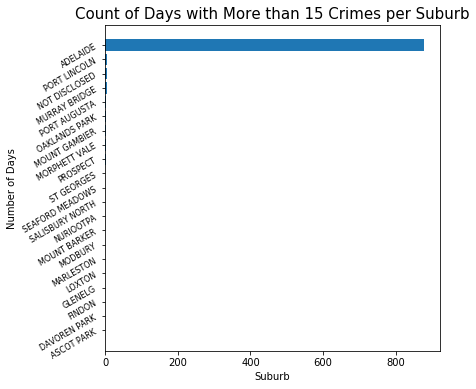

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))
index = np.arange(len(df_top15['Offence >= 15']))
plt.barh(index, df_top15['Offence >= 15'])
plt.xlabel('Suburb', fontsize=10)
plt.ylabel('Number of Days', fontsize=10)
plt.yticks(index, df_top15['Suburb - Incident'], fontsize=8, rotation=30)
plt.title('Count of Days with More than 15 Crimes per Suburb', fontsize=15)
plt.gca().invert_yaxis()
plt.show()

<font color="green"><b>
Due to the fact that Adelaide is another crime level compared to other suburbs, this not a good visualization.
</font></b>

3. Use an appropriate graph to visualize and detect outliers (extreme values) on the data from step 2 and remove them. Then, plot the data again using a bar graph.

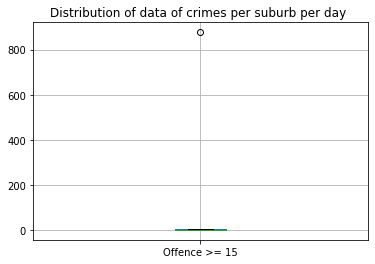

In [46]:
df_top15.boxplot(column=['Offence >= 15'])
plt.title('Distribution of data of crimes per suburb per day ')
plt.show()

<font color="green"><b>
It is crystal clear from the Boxplot the fact that Adelaide, the suburb with more crimes, is the outlier damaging the visualization. We will remove it and create another barplot:
</font></b>

In [47]:
df_top15 = df_top15.loc[df_top15['Offence >= 15']!=df_top15['Offence >= 15'].max()]

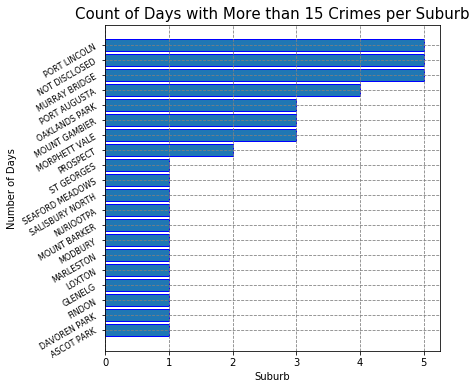

In [48]:
plt.figure(figsize=(6,6))
index = np.arange(len(df_top15['Offence >= 15']))
plt.barh(index, df_top15['Offence >= 15'], edgecolor='blue')
plt.xlabel('Suburb', fontsize=10)
plt.ylabel('Number of Days', fontsize=10)
plt.yticks(index, df_top15['Suburb - Incident'], fontsize=8, rotation=30)
plt.title('Count of Days with More than 15 Crimes per Suburb', fontsize=15)
plt.grid(color='grey', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

<font color="green"><b>
As we can see, the quality of the plot has increased significantly. The data has no outlier and at some part it is uniform.  
</font></b>

4. Compare the bar graphs in step 2 and 3. Which bar graph is easier to interpret? Why?

<font color="green"><b>
The second bar graph is much easier to interpret. As we have gone by the question most details were already explained:
- The first graph had an outstanding outlier and the only possible nalysis that could be done would be its difference to all other suburbs. 
- In the second bar graph, after removing the outlier, it was possible to observe a much more balanced distribution, where it is possible to compare different suburbs and understand which ones are most violent.   
</font></b>

#### B2. Challenge: Identify mistakes in data entry
There are some errors in the data entry in one of the columns.<br>
1.identify the data entry errors and provide possible solutions.<br>

<font color="green"><b>
We have identified after search and exploration that the data entry errors are in the 'Reported Date Column'. We will show over the next steps the will identify it, however, we won't present any other search in other columns that have been unfruitful, because this would be purposeless.<br>
First step: Transformating all unique values from 'Reported date' into a list and explore the month of January.  
</font></b>

In [49]:
dates_list = df_crimes_SA['Reported Date'].unique().tolist()
dates_list[0:31]

['2014-01-01',
 '2014-02-01',
 '2014-03-01',
 '2014-04-01',
 '2014-05-01',
 '2014-06-01',
 '2014-07-01',
 '2014-08-01',
 '2014-09-01',
 '2014-10-01',
 '2014-11-01',
 '2014-12-01',
 '2014-01-13',
 '2014-01-14',
 '2014-01-15',
 '2014-01-16',
 '2014-01-17',
 '2014-01-18',
 '2014-01-19',
 '2014-01-20',
 '2014-01-21',
 '2014-01-22',
 '2014-01-23',
 '2014-01-24',
 '2014-01-25',
 '2014-01-26',
 '2014-01-27',
 '2014-01-28',
 '2014-01-29',
 '2014-01-30',
 '2014-01-31']

<font color="green"><b>
Looking at the date, specially the item 12 and 13 I have spoted a weird pattern, that is, the date moved from '2014-12-01' to '2014-01-13', when it should continue to '2014-13-01', consistent with previous pattern. Now, we will explore if this repeats it self over the periods. 
</font></b>

In [50]:
df_jan = pd.DataFrame(dates_list[0:31])
df_fev = pd.DataFrame(dates_list[31:59])
df_mar = pd.DataFrame(dates_list[59:90])
df_apr = pd.DataFrame(dates_list[90:120])
df_mai = pd.DataFrame(dates_list[120:151])
df_jun = pd.DataFrame(dates_list[151:181])
df_month = pd.concat([df_jan, df_fev, df_mar, df_apr, df_mai, df_jun], axis = 1) 
df_month.columns = ['Jan', 'Fev', 'Mar', 'Apr', 'Mai', 'Jun']
df_month.iloc[9:15]

,Jan,Fev,Mar,Apr,Mai,Jun
9,2014-10-01,2014-10-02,2014-10-03,2014-10-04,2014-10-05,2014-10-06
10,2014-11-01,2014-11-02,2014-11-03,2014-11-04,2014-11-05,2014-11-06
11,2014-12-01,2014-12-02,2014-12-03,2014-12-04,2014-12-05,2014-12-06
12,2014-01-13,2014-02-13,2014-03-13,2014-04-13,2014-05-13,2014-06-13
13,2014-01-14,2014-02-14,2014-03-14,2014-04-14,2014-05-14,2014-06-14
14,2014-01-15,2014-02-15,2014-03-15,2014-04-15,2014-05-15,2014-06-15


<font color="green"><b>
Now, without any doubt, we have spoted a pattern. There is a shift in the way the data is presented between the day 12 and 13 of every month. it is important to notice that the data type here is actually string and not date, otherwise, it would't be possible to spot this error.<br>
The conclusion I have arrived in the following conclusion: 
- Dates when day < 12 have the month and day switched from yyyy/mm/dd to yyyy/dd/mm
We will make plots of crimes by day of month to confirm if this we have found is correct.
</font></b>

In [51]:
# group crimes by date 
df_crime_analysis_SA = df_crimes_SA.groupby('Reported Date').agg({'Offence Count': 'sum'}) 
df_crime_analysis_SA = df_crime_analysis_SA.reset_index()

# Extract the day and group by month
df_crime_analysis_day_SA = df_crime_analysis_SA.copy() 
df_crime_analysis_day_SA['Reported Date'] = pd.to_datetime(df_crime_analysis_day_SA['Reported Date']).dt.day
df_crime_analysis_day_SA = df_crime_analysis_day_SA.groupby('Reported Date').agg({'Offence Count': 'sum'}).reset_index()


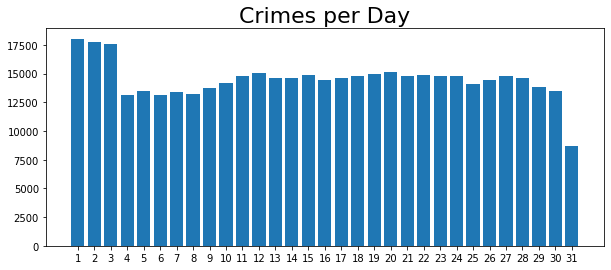

In [52]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
plt.figure(figsize = (10,4))
crimes = list(df_crime_analysis_day_SA['Offence Count'])
date = list(range(1,32))
y_pos = np.arange(len(date))
 
# Create bars
plt.bar(y_pos, crimes)
 
# Create names on the x-axis
plt.xticks(y_pos, date)
plt.title('Crimes per Day', fontsize = '22')
 
# Show graphic
plt.show()



<font color="green"><b>
This is defenetly a not expected behaviour of the number of crimes. Lets see if making changes the pattern will look better.
</font></b>

2.Use Python to fix the errors.<br>

<font color="green"><b>
To fix it, we will simply switch the by the month and vice-versa in all such cases. We will apply the changes in the dataframe df_crime_analysis_SA that has already crimes grouped by date.
</font></b>

In [53]:
df_crimes_SA['day'] = pd.to_datetime(df_crimes_SA['Reported Date']).dt.day
df_crimes_SA['month'] = pd.to_datetime(df_crimes_SA['Reported Date']).dt.month
df_crimes_SA['year'] = pd.to_datetime(df_crimes_SA['Reported Date']).dt.year
list_date = []

for i in range(len(df_crimes_SA)):
    if df_crimes_SA.iloc[i,7] < 13:
        item = pd.to_datetime(df_crimes_SA.iloc[i,0], format='%Y-%d-%m')
        list_date.append(item)
    else:
        item = pd.to_datetime(df_crimes_SA.iloc[i,0], format='%Y-%m-%d')
        list_date.append(item)
        
df_crimes_SA['Date Fixed'] = list_date


<font color="green"><b>
Now, lets check again the the plots to see how they have changed.
</font></b>

In [54]:
# group crimes by date 
df_crime_analysis_SA = df_crimes_SA.groupby('Date Fixed').agg({'Offence Count': 'sum'}) 
df_crime_analysis_SA = df_crime_analysis_SA.reset_index()

# Extract the day and group by month
df_crime_analysis_day_SA = df_crime_analysis_SA.copy() 
df_crime_analysis_day_SA['Date Fixed'] = df_crime_analysis_day_SA['Date Fixed'].dt.day
df_crime_analysis_day_SA = df_crime_analysis_day_SA.groupby('Date Fixed').agg({'Offence Count': 'sum'}).reset_index()


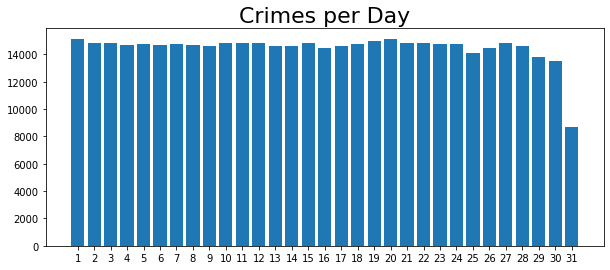

In [55]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
plt.figure(figsize = (10,4))
crimes = list(df_crime_analysis_day_SA['Offence Count'])
date = list(range(1,32))
y_pos = np.arange(len(date))
 
# Create bars
plt.bar(y_pos, crimes)
 
# Create names on the x-axis
plt.xticks(y_pos, date)
plt.title('Crimes per Day', fontsize = '22')
 
# Show graphic
plt.show()



<font color="green"><b>
Now we can see the distribution is more uniform, and it makes sense.
</font></b>

3.Argue how your answers to part B1 might be changed after fixing the errors.<br>

<font color="green"><b>
All calculations would have to be done again, since our focus in part B1 was to find more than 15 crimes in one day, and possibly the days were not correct.
</font></b>

# Task C: Exploratory Analysis on Other Data Challenge: 
Find some publicly available data and repeat some of the analysis performed in Tasks A and B above. As discussed in the lectures, there are many publicly available datasets online. For example, the Australian, US, UK, Singapore and Indian governments all provide websites with links to datasets:
• https://www.data.gov.au/ <br>
• https://www.data.gov/ <br>
• https://data.gov.uk/ <br>
• https://data.gov.sg/ <br>
• https://data.gov.in/ <br>
And Kaggle, a private company which runs data science competitions, also provide a list of their publicly available datasets: <br>
• https://www.kaggle.com/datasets <br>
Please note:
1. Your dataset(s) should contain at least 100 records.
2. Your dataset(s) should contain time component (e.g., year, day, etc.) in one of the columns.
3. Your analysis should at least contain visualisation, interpretation of your visualisation and a prediction task.
4. Please include a link to your dataset in your report. You may wish to
a. provide the direct link to the public dataset from the internet, or
b. place the data file in your Monash student - google drive and provide its link in the submission

### Task C - Repeating steps A and B in a different Dataset 
To perform **task C** I have chose [this](https://www.kaggle.com/skr912/top-10-cryptocurrencies-updateddecember-2017) Dataset. 
The title is `Top 10 Cryptocurrencies` and it contains historical financial data from the most relevant cryptos. I will focus mainly on my favorite coins: 'Bitcoin', 'Ethereum', 'Litecoin', 'Monero' and 'Dash'. The Dataset its quite extensive with daily informations such as Market Cap, Delta, daily volume traded and different prices in different times of the day. I would really like to explore all this data however, due to limited time I will only be able to work with prices. <br>
In task C, I will explore the trend of crypto prices between 2017- begin 2018, to see if any pattern may be identified.


Firstly, I will import pandas and read the CSV of everyone of those coins. Each one is in a different CSV, and has it`s own related data:

In [56]:
import pandas as pd
bitcoin = pd.read_csv("bitcoin.csv")
ethereum = pd.read_csv("ethereum.csv")
litecoin = pd.read_csv("litecoin.csv")
monero = pd.read_csv("monero.csv")
dash = pd.read_csv("dash.csv")
dash.head() # exploring the data

,Date,Open,High,Low,Close,Volume,Market.Cap,Coin,Delta
0,23-Jan-18,763.13,796.99,692.94,757.34,"110,265,000","5,978,460,000",DASH,0.018540
1,22-Jan-18,825.69,847.58,710.57,763.2,"100,651,000","6,466,930,000",DASH,0.051308
2,21-Jan-18,928.13,930.18,802.42,818.27,"109,775,000","7,267,440,000",DASH,0.090103
3,20-Jan-18,853.05,959.04,848.98,926.12,"162,376,000","6,677,870,000",DASH,0.111282
4,19-Jan-18,833.3,875.41,805.67,846.17,"126,837,000","6,521,630,000",DASH,-0.045372


As stated before, due to lack of time we will only explore the `variable price`. Our next steps we will be focused on creating a unique table that contains only the historical prices all coins, and nothing else. 

In [57]:
# Renaming and excluding all irrelevant tables for this task
bitcoin_price = bitcoin[['Date','Close']].rename(columns={'Close': 'Bitcoin'})
ethereum_price = ethereum[['Date','Close']].rename(columns={'Close': 'Ethereum'})
litecoin_price = litecoin[['Date','Close']].rename(columns={'Close': 'Litecoin'})
monero_price = monero[['Date','Close']].rename(columns={'Close': 'Monero'})
dash_price = dash[['Date','Close']].rename(columns={'Close': 'Dash'})

Now, we will join all tables, elimante again unnecessary (repeated) columns, and transform the Date column in the index of this dataframe:

In [58]:
crypto_prices = pd.concat([bitcoin_price, ethereum_price, litecoin_price, monero_price, dash_price], axis=1)
crypto_prices = crypto_prices.iloc[:, [True, True, False, True, False, True, False, True, False, True]]

In [59]:
crypto_prices['Date'] = crypto_prices['Date'].astype('datetime64[ns]')
crypto_prices = crypto_prices.drop_duplicates(subset = 'Date', keep = 'last')
crypto_prices = crypto_prices.set_index('Date')
crypto_prices = crypto_prices.sort_index(ascending = True)

Due to limitations, only a fraction of the period of the dataset will be studied. We will focus mainly on the second semester of 2017, one of the biggest moments, or hypes, in the history of cryptocurrencies. <br>
As the dataset is not flawless, there is some important missing data, which is something unacceptable for those who want to make plots of time series, because the missing periods are replaced by 0. On the folowing code:
- We are reducing significantly the period of the dataframe
- We will replace missing values by the value of last day before.

In [60]:
crypto_prices = crypto_prices.iloc[1487:,:]
crypto_prices = crypto_prices.fillna(method ='backfill') 

Continuing with our wrangling task, now we must take some action related to values `higher than 1,000.00` in this dataset. They contain `','` that make than be recognized as strings. To make matematical calculations we will need to adress this by:
1. Converting all the columns to string
2. Eliminating commas from all strings
3. Convert all the Dataframe to numeric

In [61]:
crypto_prices = crypto_prices.astype(str)

for i in range(len(crypto_prices.columns)):
    crypto_prices.iloc[:,i] = crypto_prices.iloc[:,i].apply(lambda x: x.replace(',', ''))

crypto_prices = crypto_prices.apply(pd.to_numeric)
crypto_prices.head()

,Bitcoin,Ethereum,Litecoin,Monero,Dash
Date,,,,,
2017-07-11,2337.79,197.40,45.33,37.14,165.73
2017-07-12,2398.84,230.77,48.75,40.39,179.89
2017-07-13,2357.90,209.73,46.33,38.23,171.24
2017-07-14,2233.34,199.66,42.80,35.48,161.08
2017-07-15,1998.86,170.66,38.92,32.09,140.14


`Bitcoin` has always been the most popular cryptocurrency. It was the first one and some people are still confused thinking cryptocurrencies, blockchain and bitcoin are the same thing. Due to its popularity, Bitcoin prices are much higher than all other cryptocurrencies. <br>
This is why we cannot compare criptocurrencies prices over time, the scale between currencies is completely difficult. However, its possible to compare the trend of prices over time, and this is possible putting all currencies in the same scale. We will work with base100 scale from now on.


In [62]:
crypto_prices_base100 = crypto_prices.copy() # create a new dataframe to represent the trend in prices
crypto_prices_base100.iloc[0,:] = 100 # first line scale 100

# Now we will loop on rows and columns of the main Dataframe, to create a new one, but with base 100
# We do it by deviding the price of a day buy day-1 and multipling it by the index of the previous day

for i in range(len(crypto_prices.columns)): 
    for j in range(1,len(crypto_prices)): 
        crypto_prices_base100.iloc[j, i] = (crypto_prices.iloc[j,i]/crypto_prices.iloc[j-1,i])*crypto_prices_base100.iloc[j-1,i] 

crypto_prices_base100.head()

,Bitcoin,Ethereum,Litecoin,Monero,Dash
Date,,,,,
2017-07-11,100.000000,100.000000,100.000000,100.000000,100.000000
2017-07-12,102.611441,116.904762,107.544672,108.750673,108.544017
2017-07-13,100.860214,106.246201,102.206045,102.934841,103.324685
2017-07-14,95.532105,101.144883,94.418707,95.530425,97.194232
2017-07-15,85.502120,86.453901,85.859254,86.402800,84.559223


We are now ready to produce our first visualization. <br>
We will se the evolution of crypto prices.

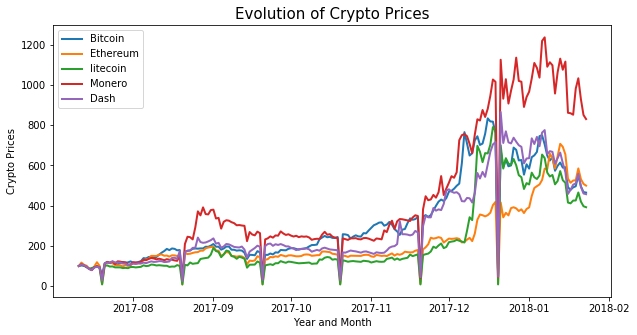

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))

plt.plot(crypto_prices_base100.index, crypto_prices_base100.Bitcoin , linewidth=2, label="Bitcoin")
plt.plot(crypto_prices_base100.index, crypto_prices_base100.Ethereum, linewidth=2, label="Ethereum")
plt.plot(crypto_prices_base100.index, crypto_prices_base100.Litecoin, linewidth=2, label="litecoin")
plt.plot(crypto_prices_base100.index, crypto_prices_base100.Monero, linewidth=2, label="Monero")
plt.plot(crypto_prices_base100.index, crypto_prices_base100.Dash, linewidth=2, label="Dash")

plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Crypto Prices')
plt.title("Evolution of Crypto Prices", fontsize = 15)
plt.show()

##  Removing Outliers

Due to an unknown reason, the Data has many outliers. We must remove than to enhance the quality of this cart. <br>
To deal with it, firstly, we will create a Dataframe with all daily returns of the each coin. To obtain this Dataframe we will folow the same steps that we did to create the Base100 Dataframe. However, the daily return can be calculated more easily. It is only <br> `(price of the coin today)/(price of the coin yesterday) - 1`

In [64]:
crypto_returns = crypto_prices.copy()

for i in range(len(crypto_prices.columns)):
    for j in range(1,len(crypto_prices)):
        crypto_returns.iloc[j, i] = (crypto_prices.iloc[j,i]/crypto_prices.iloc[j-1,i]-1)
        
crypto_returns = crypto_returns.iloc[1:,:] # removing first row that is now polution
crypto_returns.head()

,Bitcoin,Ethereum,Litecoin,Monero,Dash
Date,,,,,
2017-07-12,0.026114,0.169048,0.075447,0.087507,0.085440
2017-07-13,-0.017067,-0.091173,-0.049641,-0.053479,-0.048085
2017-07-14,-0.052827,-0.048014,-0.076193,-0.071933,-0.059332
2017-07-15,-0.104991,-0.145247,-0.090654,-0.095547,-0.129998
2017-07-16,-0.034540,-0.077933,0.051131,-0.082892,-0.053518


As we have learned in lectures and tutorials, the best way to visualize outliers are boxplots. Lets produce one:

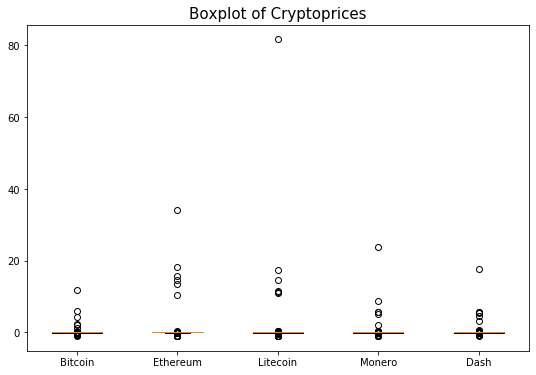

In [65]:
# Create a list of the data that will be ploted
data_to_plot = [crypto_returns['Bitcoin'], crypto_returns['Ethereum'], crypto_returns['Litecoin'], 
                crypto_returns['Monero'], crypto_returns['Dash'] ]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# setting the labels
ax.set_xticklabels(['Bitcoin', 'Ethereum', 'Litecoin', 'Monero', 'Dash'])

# Create the boxplot
bp = ax.boxplot(data_to_plot)

ax.set_title("Boxplot of Cryptoprices", fontsize = 15)
plt.show()


This chart has made cristal clear that there many relevant outliers that are avoiding a good visualization of the data. <br>
They must be removed. I have in the following [link](https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame) a way to create a function and remove outliers from a dataframe. We will use it in our dataframe.

In [66]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr 
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [67]:
# applying the function in each of the columns
crypto_returns = remove_outlier(crypto_returns, 'Bitcoin')
crypto_returns = remove_outlier(crypto_returns, 'Ethereum')
crypto_returns = remove_outlier(crypto_returns, 'Litecoin')
crypto_returns = remove_outlier(crypto_returns, 'Dash')
crypto_returns = remove_outlier(crypto_returns, 'Monero')

I will apply the exact same code to produce boxplots in the dataframe in order. Lets see if we will find a more stable distribution of the data.

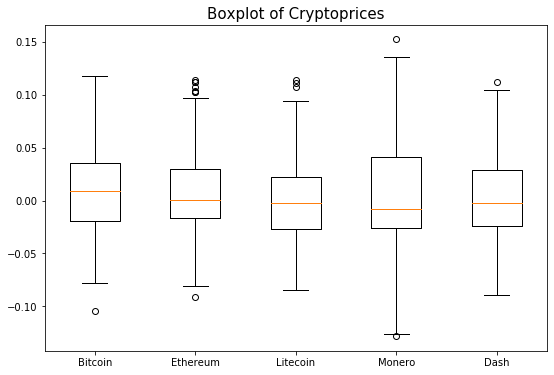

In [68]:
# Create a list of the data that will be ploted
data_to_plot = [crypto_returns['Bitcoin'], crypto_returns['Ethereum'], crypto_returns['Litecoin'], 
                crypto_returns['Monero'], crypto_returns['Dash'] ]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# setting the labels
ax.set_xticklabels(['Bitcoin', 'Ethereum', 'Litecoin', 'Monero', 'Dash'])

# Create the boxplot
bp = ax.boxplot(data_to_plot)

ax.set_title("Boxplot of Cryptoprices", fontsize = 15)
plt.show()

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')


This is much better!
However, now a problem is there. We have eliminated the rows that contains outliers from the dataframe and we must do something about it. Our goal is to plot the chart from the base100 dataframe, but the eliminated rows were actually on the daily returns dataframe. We will do the following: <br>
1. Merge the daily returns dataframe and the base 100
2. Delete all NA values and replace than by the previous value from the day before using the function `fillna`

In [69]:
crypto_prices_base100 = pd.merge(crypto_prices_base100, crypto_returns, on='Date', how = 'outer')

for i in range(len(crypto_prices_base100)):
    if crypto_prices_base100.iloc[i,6] != crypto_prices_base100.iloc[i,6]: # if the element is diferent to itself (NA checking)
        crypto_prices_base100.iloc[i,:] = crypto_prices_base100.iloc[i,6] # make all the row NA
 
crypto_prices_base100 = crypto_prices_base100.fillna(method ='backfill') # replace NA`s
crypto_prices_base100 = crypto_prices_base100.iloc[:, 0:5] # remove unwanted columns
crypto_prices_base100.head()

,Bitcoin_x,Ethereum_x,Litecoin_x,Monero_x,Dash_x
Date,,,,,
2017-07-11,100.860214,106.246201,102.206045,102.934841,103.324685
2017-07-12,100.860214,106.246201,102.206045,102.934841,103.324685
2017-07-13,100.860214,106.246201,102.206045,102.934841,103.324685
2017-07-14,95.532105,101.144883,94.418707,95.530425,97.194232
2017-07-15,82.548903,79.716312,90.249283,79.240711,80.033790


Now we will replace the same code to do a line chart. Lets see if the outliers are gone:

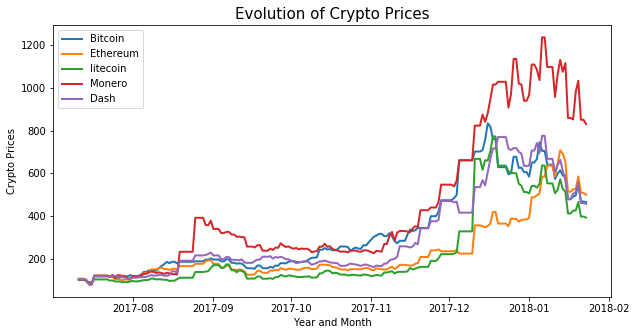

In [70]:
plt.figure(figsize=(10,5))

plt.plot(crypto_prices_base100.index, crypto_prices_base100.Bitcoin_x , linewidth=2, label="Bitcoin")
plt.plot(crypto_prices_base100.index, crypto_prices_base100.Ethereum_x, linewidth=2, label="Ethereum")
plt.plot(crypto_prices_base100.index, crypto_prices_base100.Litecoin_x, linewidth=2, label="litecoin")
plt.plot(crypto_prices_base100.index, crypto_prices_base100.Monero_x, linewidth=2, label="Monero")
plt.plot(crypto_prices_base100.index, crypto_prices_base100.Dash_x, linewidth=2, label="Dash")

plt.legend()
plt.xlabel('Year and Month')
plt.ylabel('Crypto Prices')
plt.title("Evolution of Crypto Prices", fontsize = 15)
plt.show()

Much better!
Now we will make a regression with the data and the price of cryptocurrencies over time:
- First we will create an average column with prices over time:

In [71]:
crypto_prices_base100['avg_return'] = crypto_prices_base100.sum(axis = 1)/5 
crypto_prices_base100.head()

,Bitcoin_x,Ethereum_x,Litecoin_x,Monero_x,Dash_x,avg_return
Date,,,,,,
2017-07-11,100.860214,106.246201,102.206045,102.934841,103.324685,103.114397
2017-07-12,100.860214,106.246201,102.206045,102.934841,103.324685,103.114397
2017-07-13,100.860214,106.246201,102.206045,102.934841,103.324685,103.114397
2017-07-14,95.532105,101.144883,94.418707,95.530425,97.194232,96.764071
2017-07-15,82.548903,79.716312,90.249283,79.240711,80.033790,82.357800


Now lasts make a regresion:

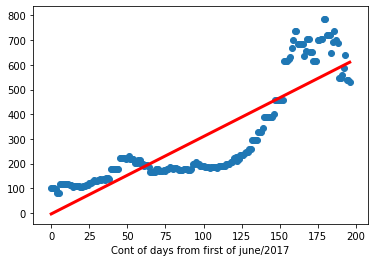

In [72]:
a = range(len(crypto_prices_base100.index))
      
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(a ,crypto_prices_base100['avg_return'])
line = [slope*xi + intercept for xi in a]
plt.plot(a,line,'r-', linewidth=3)
plt.scatter(a, crypto_prices_base100['avg_return'])
plt.xlabel('Cont of days from first of june/2017')
plt.show()


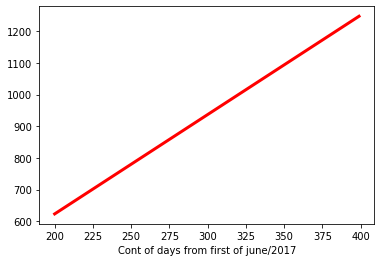

In [73]:
b = range(200,400)
      
# adding period of 2050 - 2100 to the index
period = list(range(200,400))

new_line = [slope*xi + intercept for xi in period]
plt.plot(b,new_line,'r-', linewidth=3)
plt.xlabel('Cont of days from first of june/2017')
plt.show()


References:
https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame <br>
http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/ <br>

<font color="green"><b>
As we can see, the state of Queensland has the highest Net Interstate Migration.
</font></b>